# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
from joblib import Parallel, delayed
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from joblib import dump

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Download latest version
path = kagglehub.dataset_download("ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo")

# Assuming the downloaded dataset is a CSV file
data = pd.read_csv(path + '/Live.csv')
data.head()

100%|██████████| 138k/138k [00:00<00:00, 39.5MB/s]

Extracting files...


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Memahami Struktur Data
print("=== Memahami Struktur Data ===")
print("\nJumlah baris dan kolom dalam dataset:")
print(data.shape)

print("\nInformasi dataset:")
print(data.info())

print("\nJenis data di setiap kolom:")
print(data.dtypes)

print("\nPersebaran data pada kolom numerik:")
data.describe()

=== Memahami Struktur Data ===

Jumlah baris dan kolom dalam dataset:
(7050, 16)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      f

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN



=== Cek Data yang Hilang ===

Jumlah nilai missing value setiap kolom:
status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


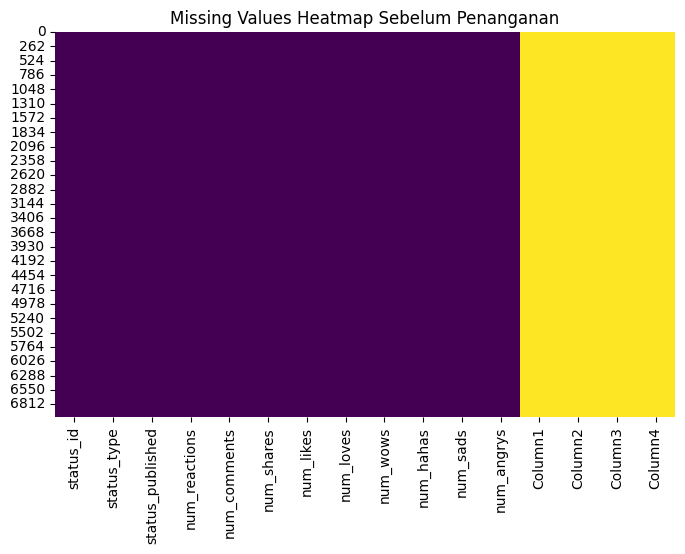

In [4]:
# Cek Data yang Hilang
print("\n=== Cek Data yang Hilang ===")
print("\nJumlah nilai missing value setiap kolom:")
print(data.isnull().sum())

# Visualisasi missing value sebelum penanganan
plt.figure(figsize=(8, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap Sebelum Penanganan")
plt.show()

In [5]:
# Mengatasi Missing value
# Menghapus kolom yang memiliki banyak missing value
data.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

# Cek Hasil Preprocessing
print("\n=== Hasil Preprocessing ===")
print(data.info())
print("\nJumlah missing value setelah penanganan:")
print(data.isnull().sum())


=== Hasil Preprocessing ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB
None

Jumlah missing value setelah penanganan:
status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares 

In [6]:
# Mengubah kolom 'status_published' ke tipe datetime
data['status_published'] = pd.to_datetime(data['status_published'])
print("\n=== Hasil Preprocessing ===")
print(data.info())


=== Hasil Preprocessing ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_id         7050 non-null   object        
 1   status_type       7050 non-null   object        
 2   status_published  7050 non-null   datetime64[ns]
 3   num_reactions     7050 non-null   int64         
 4   num_comments      7050 non-null   int64         
 5   num_shares        7050 non-null   int64         
 6   num_likes         7050 non-null   int64         
 7   num_loves         7050 non-null   int64         
 8   num_wows          7050 non-null   int64         
 9   num_hahas         7050 non-null   int64         
 10  num_sads          7050 non-null   int64         
 11  num_angrys        7050 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 661.1+ KB
None


=== Analisis Distribusi Variabel Numerik ===

Statistik Deskriptif untuk Variabel Numerik:
       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183    

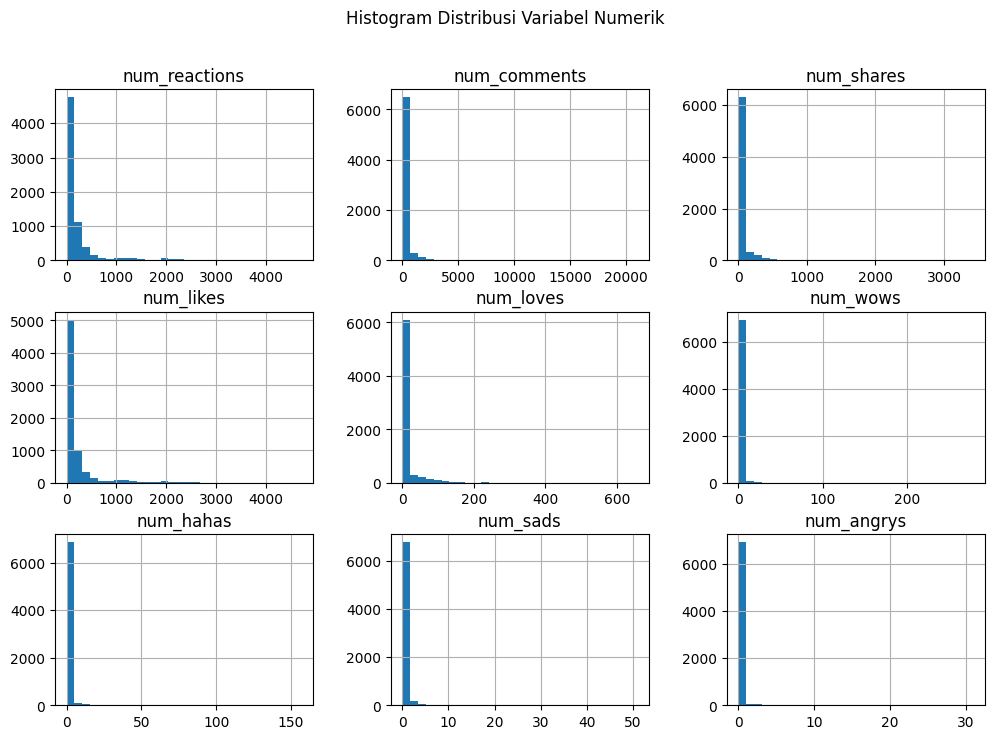


Visualisasi Distribusi Variabel Numerik (Boxplot):


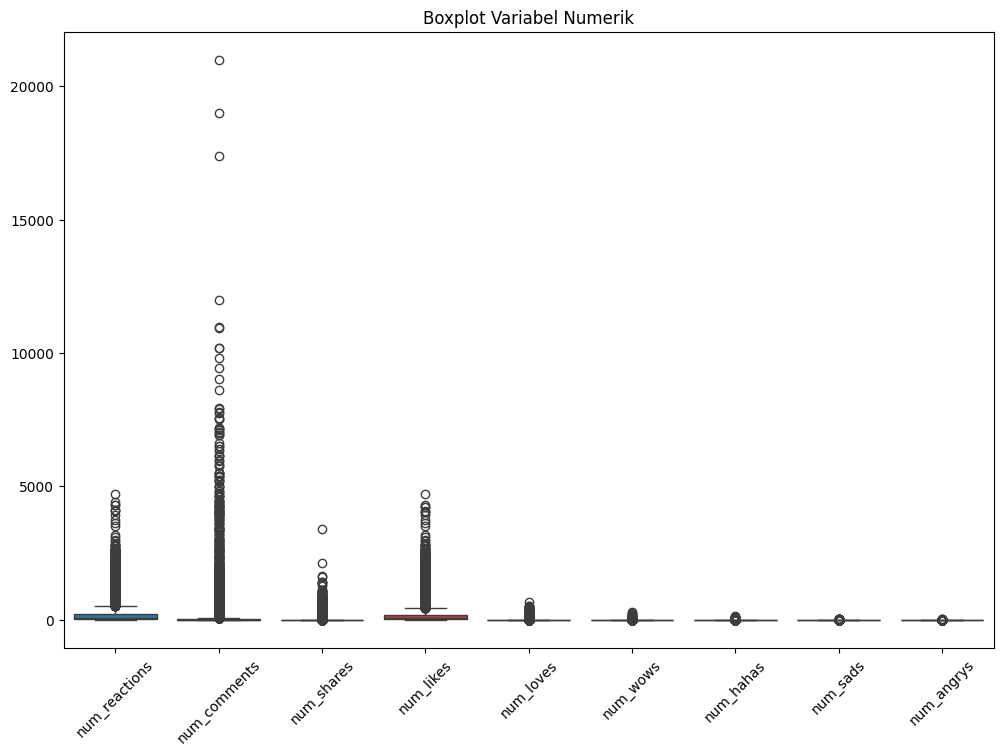


=== Analisis Hubungan Antar Variabel ===

Matriks Korelasi untuk Variabel Numerik:
               num_reactions  num_comments  num_shares  num_likes  num_loves  \
num_reactions       1.000000      0.150843    0.250723   0.994923   0.305003   
num_comments        0.150843      1.000000    0.640637   0.101687   0.521223   
num_shares          0.250723      0.640637    1.000000   0.172492   0.820000   
num_likes           0.994923      0.101687    0.172492   1.000000   0.209308   
num_loves           0.305003      0.521223    0.820000   0.209308   1.000000   
num_wows            0.267752      0.162394    0.407628   0.207800   0.508798   
num_hahas           0.176028      0.325048    0.399826   0.120784   0.507830   
num_sads            0.075138      0.236453    0.199970   0.052169   0.207600   
num_angrys          0.124326      0.225184    0.312513   0.087431   0.371001   

               num_wows  num_hahas  num_sads  num_angrys  
num_reactions  0.267752   0.176028  0.075138    0.124326

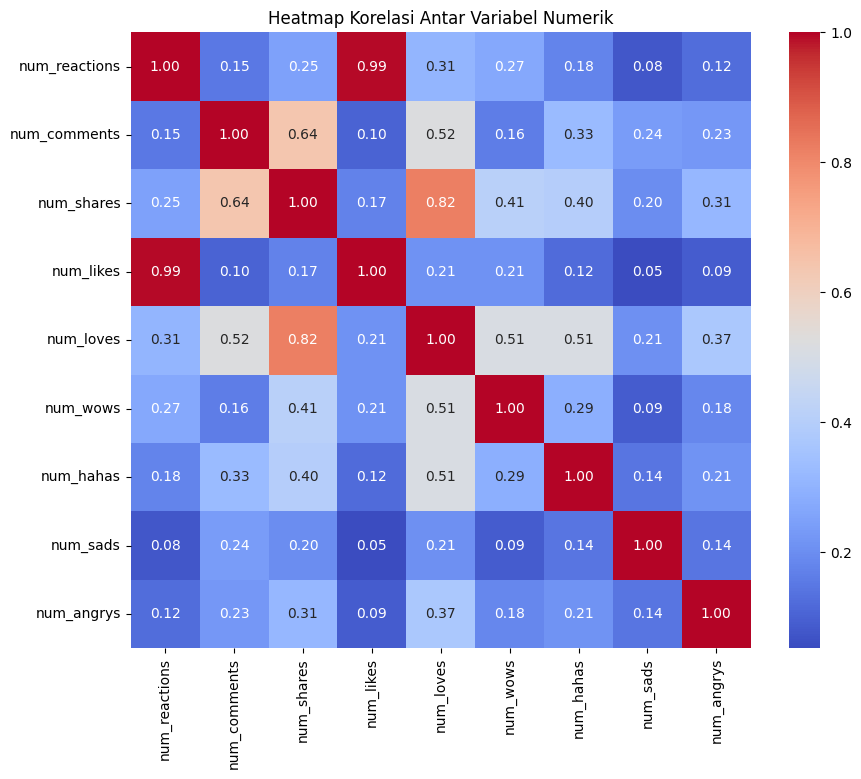

In [7]:
# Analisis Distribusi Variabel Numerik
print("=== Analisis Distribusi Variabel Numerik ===")

# Statistik deskriptif untuk variabel numerik
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("\nStatistik Deskriptif untuk Variabel Numerik:")
print(data[numerical_cols].describe())

# Visualisasi distribusi variabel numerik dengan histogram
print("\nVisualisasi Distribusi Variabel Numerik (Histogram):")
data[numerical_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

# Visualisasi distribusi variabel numerik dengan boxplot
print("\nVisualisasi Distribusi Variabel Numerik (Boxplot):")
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_cols])
plt.title("Boxplot Variabel Numerik")
plt.xticks(rotation=45)
plt.show()

# Analisis Hubungan Antar Variabel
print("\n=== Analisis Hubungan Antar Variabel ===")

# Matriks korelasi untuk variabel numerik
print("\nMatriks Korelasi untuk Variabel Numerik:")
corr_matrix = data[numerical_cols].corr()
print(corr_matrix)

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()


Diagram Batang untuk Kolom Kategorikal Terpilih:


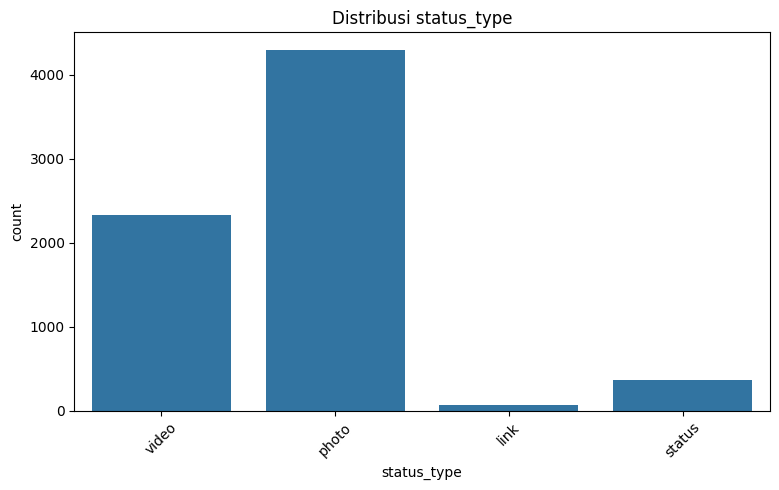

In [8]:
# Daftar kolom kategorikal yang akan divisualisasikan
categorical_cols = ['status_type']

# Hitung jumlah kolom kategorikal
n_cols = len(categorical_cols)

# Buat subplot grid
n_rows = (n_cols + 1) // 2  # Jumlah baris disesuaikan dengan jumlah kolom
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Ratakan array axes untuk memudahkan iterasi

# Visualisasi distribusi variabel kategorikal dengan diagram batang
print("\nDiagram Batang untuk Kolom Kategorikal Terpilih:")
for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Sembunyikan subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Scatter Plot untuk Hubungan Antar Variabel Numerik:


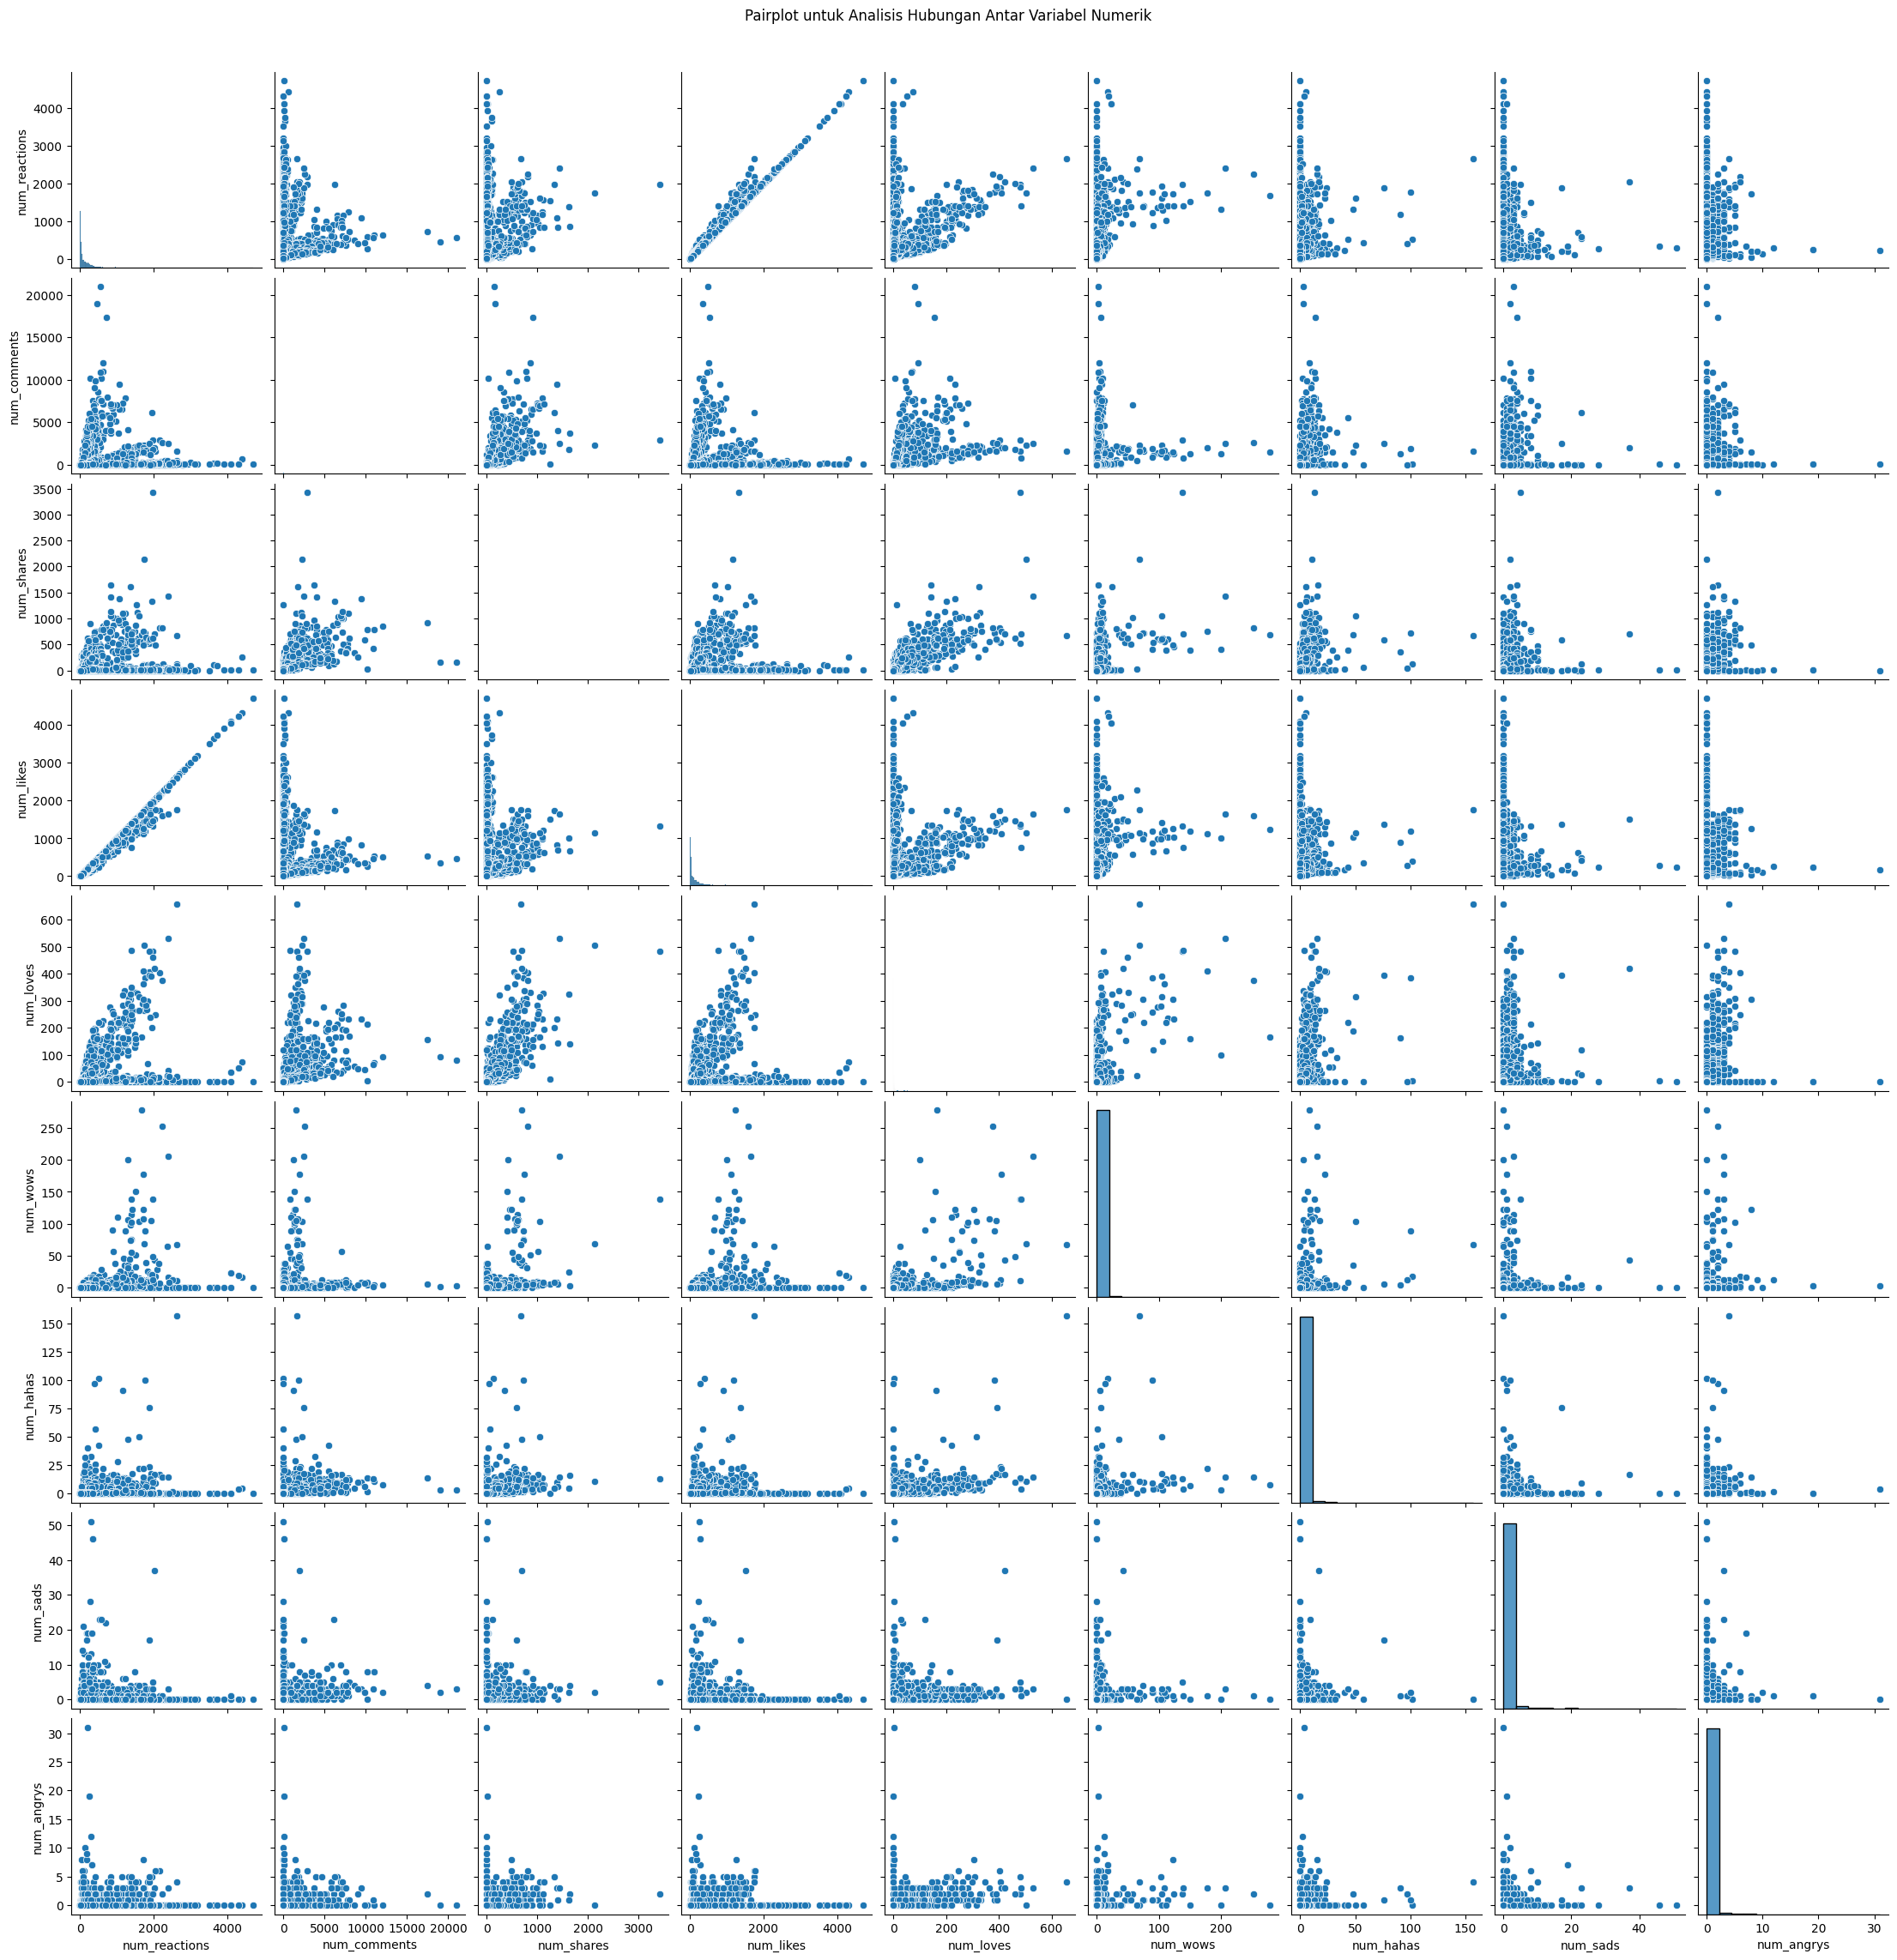

In [9]:
# Scatter plot untuk melihat hubungan antara dua variabel numerik
print("\nScatter Plot untuk Hubungan Antar Variabel Numerik:")
sns.pairplot(data[numerical_cols])
plt.suptitle("Pairplot untuk Analisis Hubungan Antar Variabel Numerik", y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
# Drop 'status_id'
data = data.drop(columns=['status_id'])

In [11]:
X = data[numerical_cols]
# Cek kolom yang mengandung NaN sebelum penanganan
print("Sebelum imputasi:")
print(X.isnull().sum())

# Mengisi NaN dengan mean dari setiap kolom
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Mengonversi X_imputed kembali ke DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Cek kolom yang mengandung NaN setelah penanganan
print("\nSetelah imputasi:")
print(X_imputed_df.isnull().sum())

Sebelum imputasi:
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

Setelah imputasi:
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64


In [12]:
# Cek dan Menghapus Data Duplikat
print("\n=== Cek Data Duplikat ===")
print(data.duplicated().sum())
print("\n=== Menghapus Data Duplikat ===")
data.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah menghapus duplikat: {len(data)}")


=== Cek Data Duplikat ===
54

=== Menghapus Data Duplikat ===
Jumlah baris setelah menghapus duplikat: 6996


In [13]:
# Normalisasi atau Standarisasi Fitur
print("\n=== Normalisasi atau Standarisasi Fitur ===")

# Standarisasi (mengubah distribusi data ke mean=0 dan std=1)
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nData setelah standarisasi/normalisasi:")
print(data[numerical_cols].head())


=== Normalisasi atau Standarisasi Fitur ===

Data setelah standarisasi/normalisasi:
   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       0.670997      0.320713    1.678925   0.504931   1.975556  0.200140   
1      -0.165793     -0.252726   -0.304974  -0.136574  -0.318037 -0.143631   
2       0.004215      0.011593    0.126637  -0.013733   0.205501 -0.029041   
3      -0.251900     -0.252726   -0.304974  -0.225293  -0.318037 -0.143631   
4      -0.026696     -0.252726   -0.304974  -0.013733  -0.093663 -0.143631   

   num_hahas  num_sads  num_angrys  
0   0.075978  0.517985   -0.160026  
1  -0.175819 -0.157094   -0.160026  
2   0.075978 -0.157094   -0.160026  
3  -0.175819 -0.157094   -0.160026  
4  -0.175819 -0.157094   -0.160026  


In [14]:
# Deteksi dan Penanganan Outlier
print("\n=== Deteksi dan Penanganan Outlier ===")

# Deteksi outlier menggunakan IQR (Interquartile Range)
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menangani outlier dengan mengganti nilai outlier dengan batas bawah/atas
    data[col] = np.where(
        (data[col] < lower_bound) | (data[col] > upper_bound),
        np.clip(data[col], lower_bound, upper_bound),  # Clip nilai ke batas bawah/atas
        data[col]
    )

print("\nData setelah penanganan outlier:")
print(data[numerical_cols].describe())


=== Deteksi dan Penanganan Outlier ===

Data setelah penanganan outlier:
       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    6996.000000   6996.000000  6996.000000  6996.000000  6996.000000   
mean       -0.187752     -0.235176    -0.285167    -0.200085    -0.269831   
std         0.364187      0.024004     0.030150     0.318785     0.073930   
min        -0.496976     -0.252726    -0.304974    -0.477800    -0.318037   
25%        -0.459442     -0.252726    -0.304974    -0.439127    -0.318037   
50%        -0.368918     -0.248246    -0.304974    -0.348134    -0.318037   
75%        -0.020072     -0.227806    -0.274686    -0.063779    -0.243246   
max         0.638983     -0.190426    -0.229253     0.499243    -0.131059   

           num_wows     num_hahas      num_sads    num_angrys  
count  6.996000e+03  6.996000e+03  6.996000e+03  6.996000e+03  
mean  -1.436307e-01 -1.758188e-01 -1.570938e-01 -1.600255e-01  
std    1.407308e-14  1.831999e-15  1.526

In [15]:
# Encoding Data Kategorikal
print("\n=== Encoding Data Kategorikal ===")

status_type = data['status_type']

# One-Hot Encoding untuk kolom kategorikal
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' untuk menghindari multicollinearity
encoded_cat = encoder.fit_transform(data[categorical_cols])

# Membuat DataFrame dari hasil encoding
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_cols))

# Gabungkan hasil encoding dengan dataset numerik
data_processed = pd.concat([data[numerical_cols], encoded_cat_df], axis=1)

print("\nData setelah encoding kategorikal:")
print(data_processed.head())


=== Encoding Data Kategorikal ===

Data setelah encoding kategorikal:
   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0       0.638983     -0.190426   -0.229253   0.499243  -0.131059 -0.143631   
1      -0.165793     -0.252726   -0.304974  -0.136574  -0.318037 -0.143631   
2       0.004215     -0.190426   -0.229253  -0.013733  -0.131059 -0.143631   
3      -0.251900     -0.252726   -0.304974  -0.225293  -0.318037 -0.143631   
4      -0.026696     -0.252726   -0.304974  -0.013733  -0.131059 -0.143631   

   num_hahas  num_sads  num_angrys  status_type_photo  status_type_status  \
0  -0.175819 -0.157094   -0.160026                0.0                 0.0   
1  -0.175819 -0.157094   -0.160026                1.0                 0.0   
2  -0.175819 -0.157094   -0.160026                0.0                 0.0   
3  -0.175819 -0.157094   -0.160026                1.0                 0.0   
4  -0.175819 -0.157094   -0.160026                1.0                 0.0  

In [16]:
# Binning (Pengelompokan Data) untuk Semua Kolom Numerik
print("\n=== Binning (Pengelompokan Data) untuk Semua Kolom Numerik ===")

# Loop melalui setiap kolom numerik dan lakukan binning
for col in numerical_cols:
    # Binning menggunakan pd.cut (bisa diganti dengan pd.qcut untuk binning berdasarkan kuantil)
    data_processed[f'{col}_Bin'] = pd.cut(
        data_processed[col],
        bins=4,  # Bisa disesuaikan jumlah bins
        labels=['Low', 'Medium', 'High', 'Very High']  # Label untuk setiap bin
    )

    # Tampilkan distribusi binning
    print(f"\nDistribusi binning untuk {col}:")
    print(data_processed[f'{col}_Bin'].value_counts())


=== Binning (Pengelompokan Data) untuk Semua Kolom Numerik ===

Distribusi binning untuk num_reactions:
num_reactions_Bin
Low          4449
Medium       1115
Very High     899
High          533
Name: count, dtype: int64

Distribusi binning untuk num_comments:
num_comments_Bin
Low          4822
Very High    1455
Medium        539
High          180
Name: count, dtype: int64

Distribusi binning untuk num_shares:
num_shares_Bin
Low          5033
Very High    1479
Medium        358
High          126
Name: count, dtype: int64

Distribusi binning untuk num_likes:
num_likes_Bin
Low          4394
Medium       1111
Very High     995
High          496
Name: count, dtype: int64

Distribusi binning untuk num_loves:
num_loves_Bin
Low          4832
Very High    1450
Medium        484
High          230
Name: count, dtype: int64

Distribusi binning untuk num_wows:
num_wows_Bin
Medium       6996
Low             0
High            0
Very High       0
Name: count, dtype: int64

Distribusi binning untuk nu

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

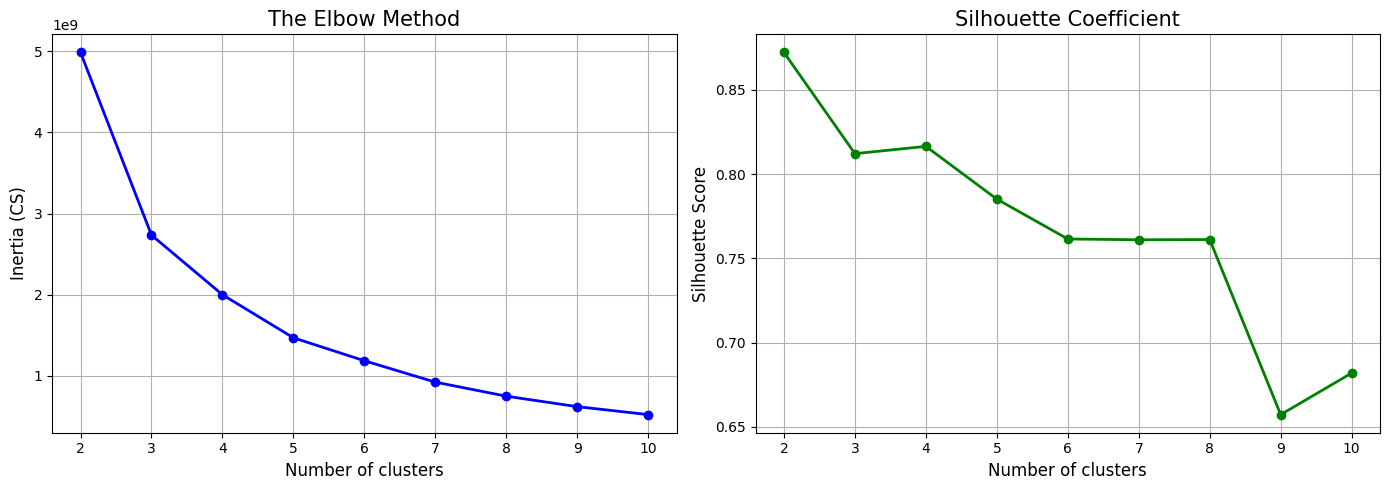

In [17]:
X = X_imputed_df

# Identifying Optimal K Value
cs = []
silhouette_coefficients = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
    silhouette_coefficients.append(silhouette_score(X, kmeans.labels_))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method plot
axes[0].plot(range(2, 11), cs, marker='o', linestyle='-', color='b', linewidth=2)
axes[0].set_title('The Elbow Method', fontsize=15)
axes[0].set_xlabel('Number of clusters', fontsize=12)
axes[0].set_ylabel('Inertia (CS)', fontsize=12)
axes[0].grid(True)

# Silhouette Score plot
axes[1].plot(range(2, 11), silhouette_coefficients, marker='o', linestyle='-', color='g', linewidth=2)
axes[1].set_title('Silhouette Coefficient', fontsize=15)
axes[1].set_xlabel('Number of clusters', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [18]:
# Definisikan range jumlah cluster yang ingin diuji
k_range = range(2, 11)

# Inisialisasi list untuk menyimpan Silhouette Score
silhouette_scores = []

# Loop untuk menghitung Silhouette Score pada setiap jumlah cluster
for k in k_range:
    # Inisialisasi KMeans dengan jumlah cluster saat ini
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit model dan prediksi cluster
    labels = kmeans.fit_predict(X)

    # Hitung Silhouette Score
    score = silhouette_score(X, labels)

    # Simpan score ke dalam list
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")

Silhouette Score untuk k=2: 0.8722
Silhouette Score untuk k=3: 0.8121
Silhouette Score untuk k=4: 0.8176
Silhouette Score untuk k=5: 0.7852
Silhouette Score untuk k=6: 0.7600
Silhouette Score untuk k=7: 0.7658
Silhouette Score untuk k=8: 0.6502
Silhouette Score untuk k=9: 0.6694
Silhouette Score untuk k=10: 0.6586


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

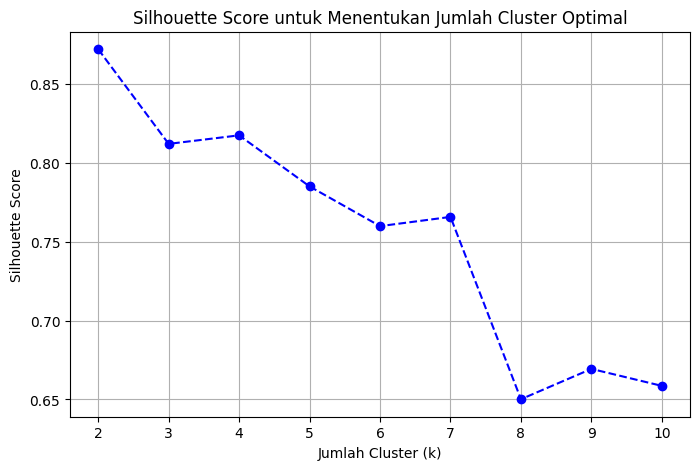


Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [19]:
# Plot hasil Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)  # Menambahkan grid untuk memudahkan pembacaan
plt.xticks(k_range)  # Memastikan sumbu x menampilkan semua nilai k yang diuji
plt.show()

# Menampilkan jumlah cluster optimal berdasarkan Silhouette Score tertinggi
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nJumlah cluster optimal berdasarkan Silhouette Score: {optimal_k}")

In [20]:
# Latih Model K-Means dengan Jumlah Cluster Optimal
print("\n=== Latih Model K-Means dengan Jumlah Cluster Optimal ===")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
data_processed['KMeans_Cluster'] = kmeans_labels  # Tambahkan hasil clustering ke dataset


=== Latih Model K-Means dengan Jumlah Cluster Optimal ===


=== Evaluasi Model Sebelum Feature Selection ===
Silhouette Score sebelum feature selection: 0.87


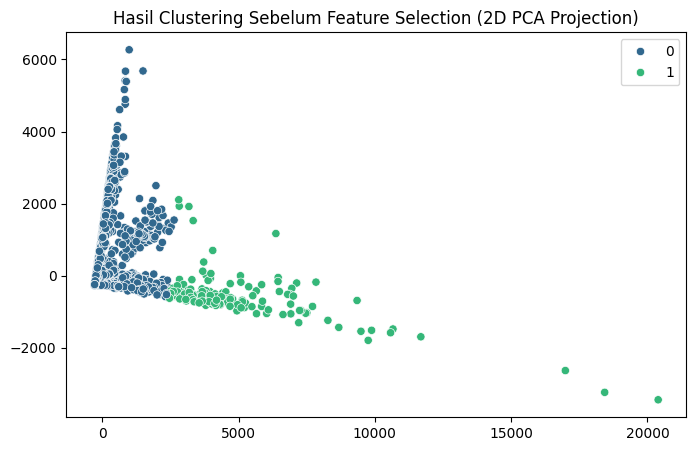

In [21]:
# Evaluasi Model Sebelum Feature Selection
print("=== Evaluasi Model Sebelum Feature Selection ===")

# Latih model K-Means dengan semua fitur
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score sebelum feature selection: {kmeans_score:.2f}")

# Visualisasi hasil clustering sebelum feature selection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("Hasil Clustering Sebelum Feature Selection (2D PCA Projection)")
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [22]:
# Feature Selection
print("\n=== Feature Selection ===")

# Gunakan SelectKBest untuk memilih fitur terbaik
selector = SelectKBest(score_func=mutual_info_classif, k=5)  # Pilih 5 fitur terbaik
X_selected = selector.fit_transform(X, kmeans_labels)  # Gunakan label clustering sebagai target

# Dapatkan nama fitur terpilih
selected_features = X.columns[selector.get_support()]
print("Fitur terpilih setelah feature selection:", selected_features)


=== Feature Selection ===
Fitur terpilih setelah feature selection: Index(['num_comments', 'num_shares', 'num_loves', 'num_hahas', 'num_sads'], dtype='object')



=== Evaluasi Model Setelah Feature Selection ===
Silhouette Score setelah feature selection: 0.94


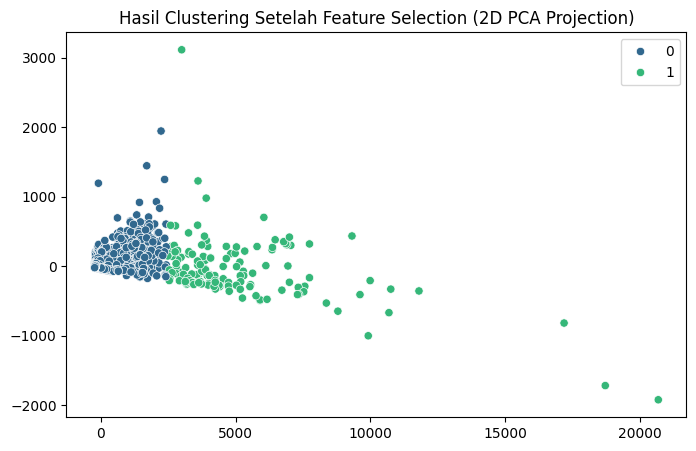

In [23]:
# Evaluasi Model Setelah Feature Selection
print("\n=== Evaluasi Model Setelah Feature Selection ===")

# Latih model K-Means dengan fitur terpilih
kmeans_selected = KMeans(n_clusters=2, random_state=42)
kmeans_labels_selected = kmeans_selected.fit_predict(X_selected)
kmeans_score_selected = silhouette_score(X_selected, kmeans_labels_selected)
print(f"Silhouette Score setelah feature selection: {kmeans_score_selected:.2f}")

# Visualisasi hasil clustering setelah feature selection
pca_selected = PCA(n_components=2)
X_pca_selected = pca_selected.fit_transform(X_selected)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca_selected[:, 0], y=X_pca_selected[:, 1], hue=kmeans_labels_selected, palette='viridis')
plt.title("Hasil Clustering Setelah Feature Selection (2D PCA Projection)")
plt.show()

In [24]:
# Bandingkan Performa Model Sebelum dan Sesudah Feature Selection
print("\n=== Perbandingan Performa Model ===")
print(f"Silhouette Score sebelum feature selection: {kmeans_score:.2f}")
print(f"Silhouette Score setelah feature selection: {kmeans_score_selected:.2f}")

if kmeans_score_selected > kmeans_score:
    print("Feature selection meningkatkan performa model.")
else:
    print("Feature selection tidak meningkatkan performa model.")


=== Perbandingan Performa Model ===
Silhouette Score sebelum feature selection: 0.87
Silhouette Score setelah feature selection: 0.94
Feature selection meningkatkan performa model.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [25]:
# Gabungkan label cluster dengan data asli
data_with_clusters = X.copy()  # Salin data asli
data_with_clusters['Cluster'] = kmeans_labels_selected

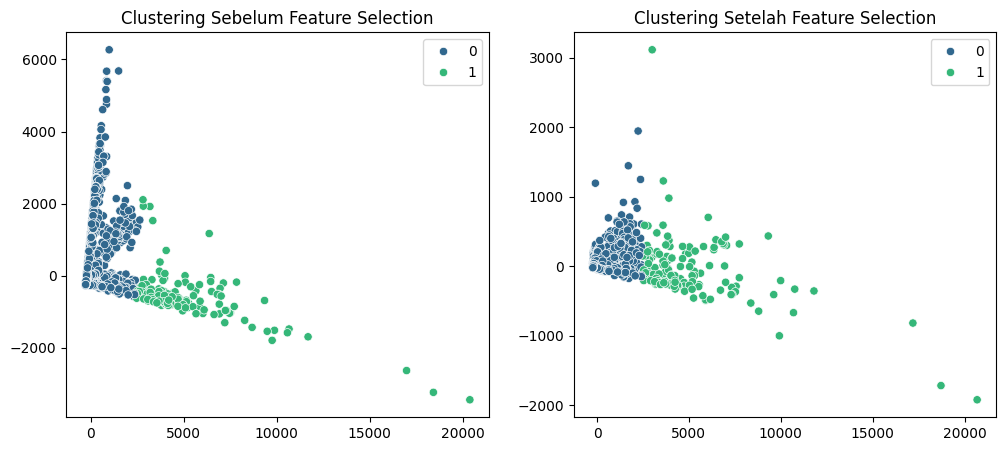

In [26]:
plt.figure(figsize=(12, 5))

# Sebelum feature selection
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("Clustering Sebelum Feature Selection")

# Setelah feature selection
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca_selected[:, 0], y=X_pca_selected[:, 1], hue=kmeans_labels_selected, palette='viridis')
plt.title("Clustering Setelah Feature Selection")

plt.show()

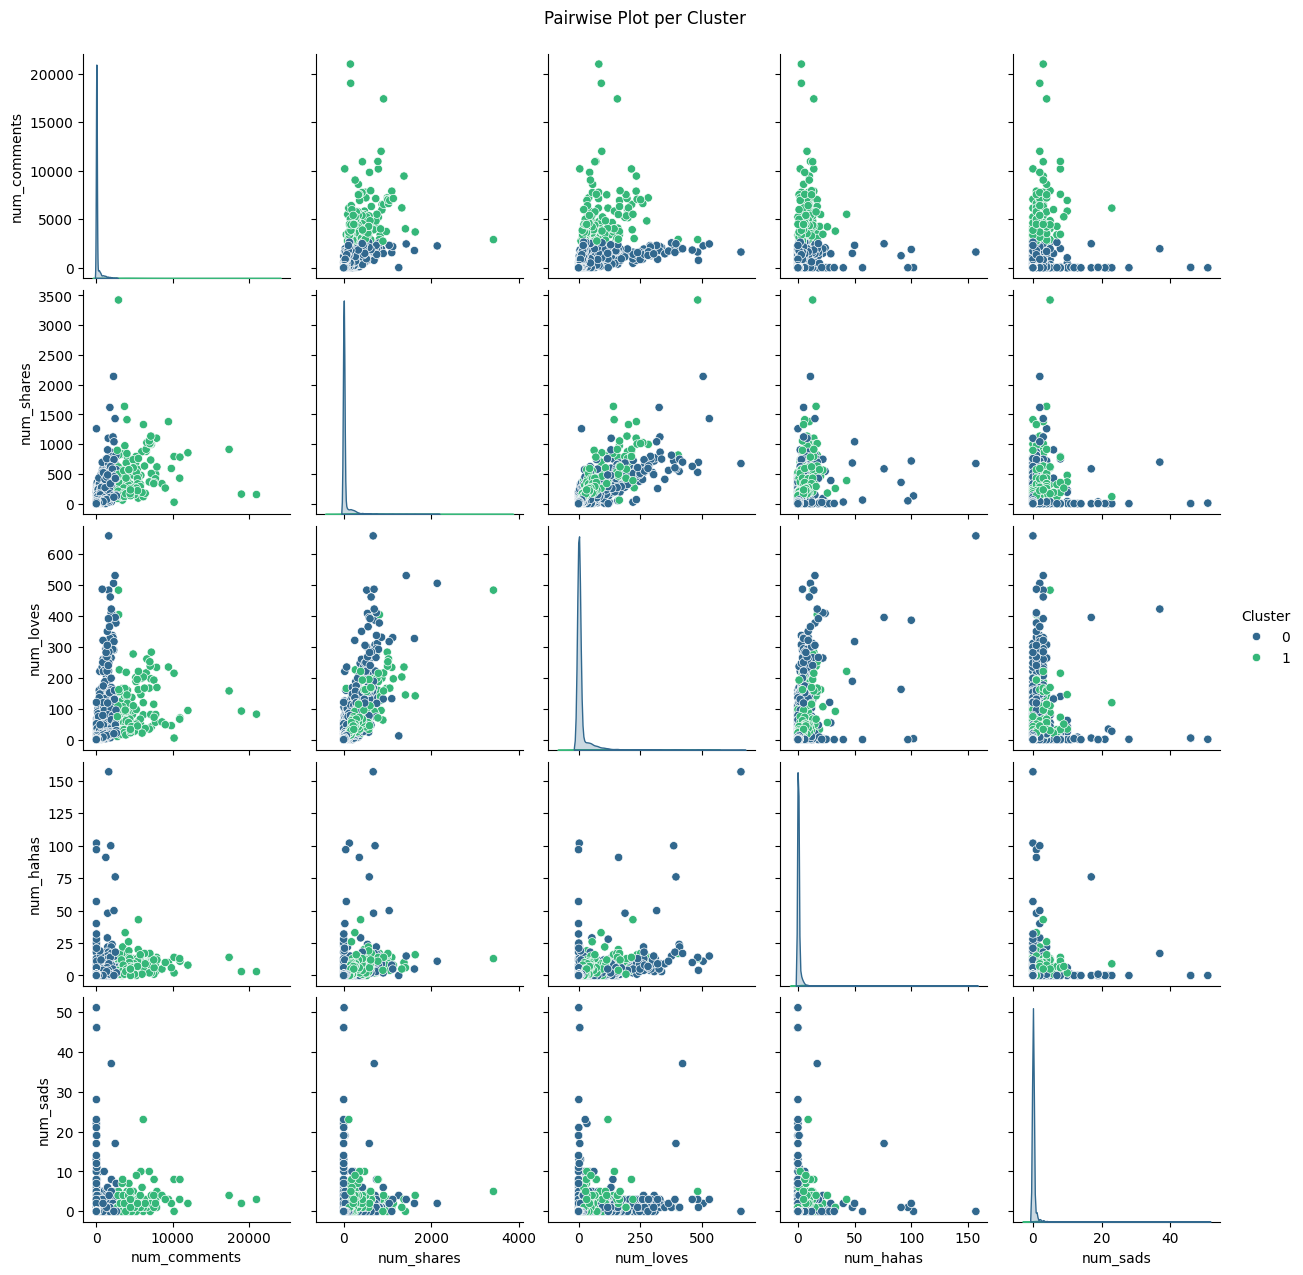

In [27]:
# Visualisasi tambahan
sns.pairplot(data_with_clusters, hue='Cluster', palette='viridis', vars=selected_features)
plt.suptitle('Pairwise Plot per Cluster', y=1.02)
plt.show()

In [28]:
# Analisis Karakteristik Cluster
print("\n=== Analisis Karakteristik Cluster ===")

# Analisis untuk K-Means
print("\nAnalisis Karakteristik Cluster (K-Means):")
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    print(data_processed[data_processed['KMeans_Cluster'] == cluster][numerical_cols].mean())


=== Analisis Karakteristik Cluster ===

Analisis Karakteristik Cluster (K-Means):

Cluster 0:
num_reactions   -0.191644
num_comments    -0.235613
num_shares      -0.285604
num_likes       -0.203312
num_loves       -0.271002
num_wows        -0.143631
num_hahas       -0.175819
num_sads        -0.157094
num_angrys      -0.160026
dtype: float64

Cluster 1:
num_reactions    0.001474
num_comments    -0.213952
num_shares      -0.263945
num_likes       -0.043184
num_loves       -0.212923
num_wows        -0.143631
num_hahas       -0.175819
num_sads        -0.157094
num_angrys      -0.160026
dtype: float64


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

<ipython-input-29-f2f367bcdb0b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')


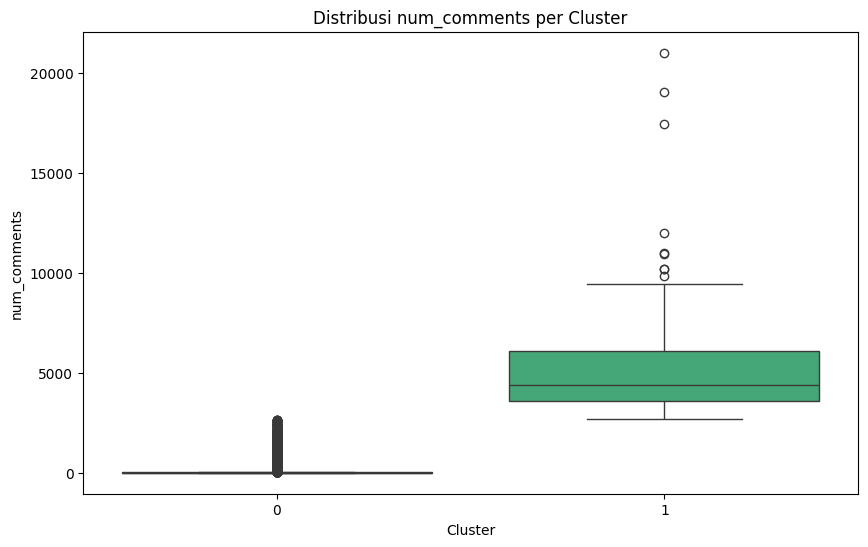

<ipython-input-29-f2f367bcdb0b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')


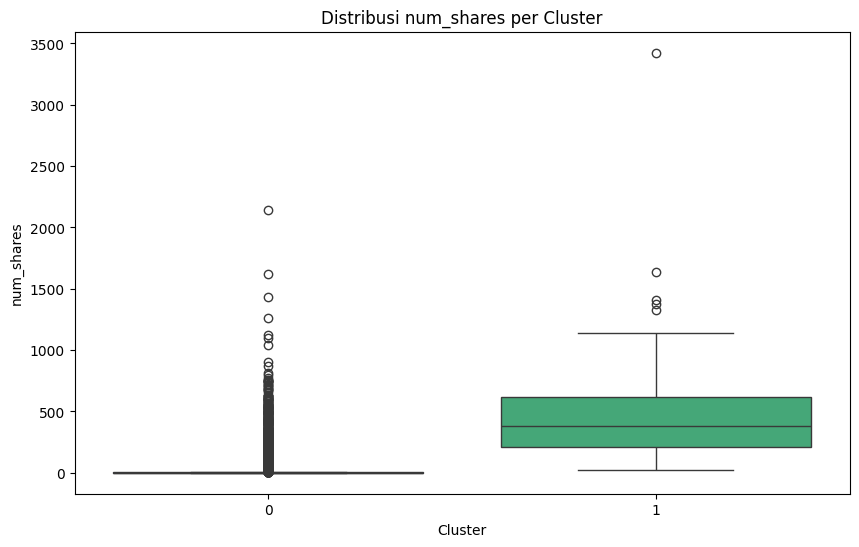

<ipython-input-29-f2f367bcdb0b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')


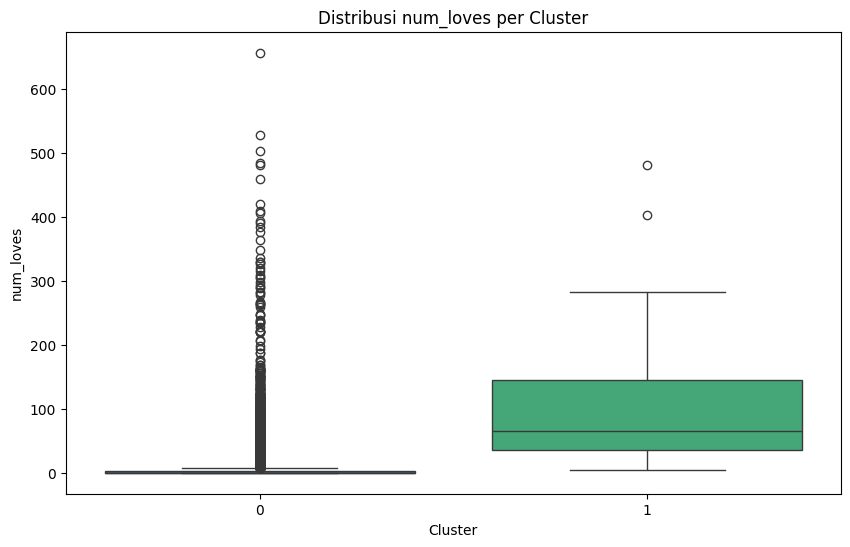

<ipython-input-29-f2f367bcdb0b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')


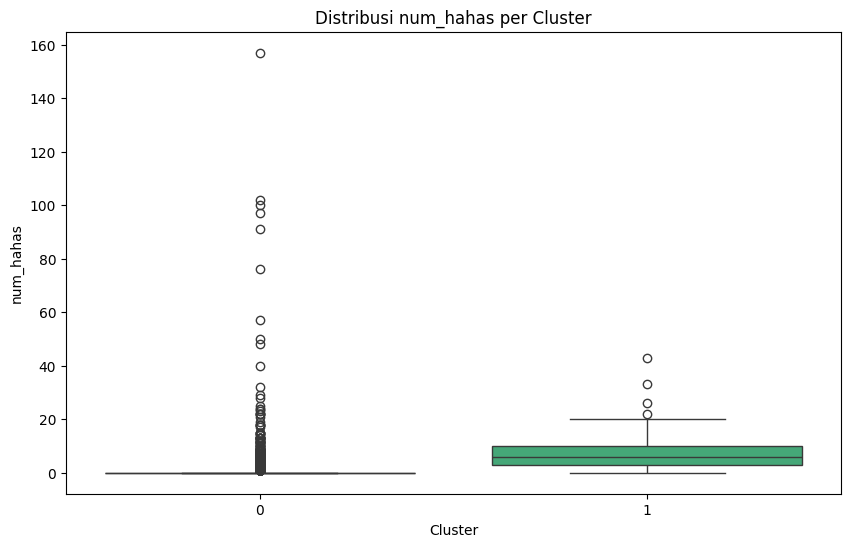

<ipython-input-29-f2f367bcdb0b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')


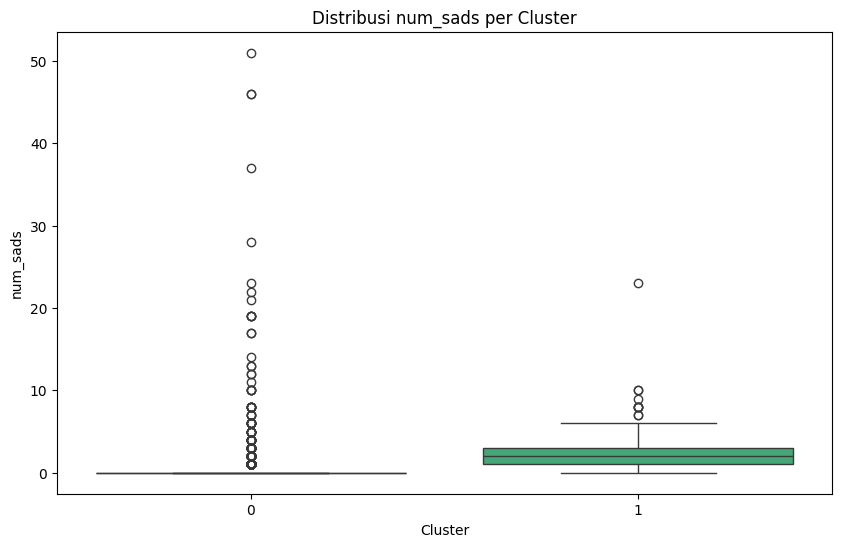

In [29]:
# Analisis distribusi fitur dalam tiap cluster
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')
    plt.title(f'Distribusi {feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

In [30]:
# Analisis statistik deskriptif per cluster
cluster_stats = data_with_clusters.groupby('Cluster')[selected_features].mean()
print("Rata-rata nilai fitur per cluster:")
print(cluster_stats)

# Analisis ukuran cluster
cluster_sizes = data_with_clusters['Cluster'].value_counts().sort_index()
print("\nJumlah data per cluster:")
print(cluster_sizes)

Rata-rata nilai fitur per cluster:
         num_comments  num_shares  num_loves  num_hahas  num_sads
Cluster                                                          
0          122.802199   31.122124  11.036174   0.560990  0.197945
1         5273.553957  482.546763  96.877698   7.431655  2.517986

Jumlah data per cluster:
Cluster
0    6911
1     139
Name: count, dtype: int64


In [31]:
# Interpretasi hasil clustering
print("\n=== Interpretasi Hasil Clustering ===")
for cluster in cluster_stats.index:
    print(f"\nKarakteristik Cluster {cluster}:")
    for feature in selected_features:
        print(f"- Rata-rata {feature}: {cluster_stats.loc[cluster, feature]:.2f}")
    print(f"- Jumlah data: {cluster_sizes[cluster]}")


=== Interpretasi Hasil Clustering ===

Karakteristik Cluster 0:
- Rata-rata num_comments: 122.80
- Rata-rata num_shares: 31.12
- Rata-rata num_loves: 11.04
- Rata-rata num_hahas: 0.56
- Rata-rata num_sads: 0.20
- Jumlah data: 6911

Karakteristik Cluster 1:
- Rata-rata num_comments: 5273.55
- Rata-rata num_shares: 482.55
- Rata-rata num_loves: 96.88
- Rata-rata num_hahas: 7.43
- Rata-rata num_sads: 2.52
- Jumlah data: 139


Tulis hasil interpretasinya di sini.
1. **Cluster 0: Postingan dengan Engagement Rendah**
- **Karakteristik**:
    a. num_comments: 122.80
    b. num_shares: 31.12
    c. num_loves: 11.04
    d. num_hahas: 0.56
    e. num_sads: 0.20
    f. Jumlah data: 6.911

- **Interpretasi Bisnis**:
Postingan dalam Cluster 0 memiliki engagement yang rendah secara keseluruhan. Meskipun rata-rata komentar (122.80) dan shares (31.12) terlihat cukup, angka ini masih jauh lebih rendah dibandingkan dengan Cluster 1. Reaksi emosional seperti num_loves, num_hahas, dan num_sads juga sangat rendah, menunjukkan bahwa postingan ini kurang memicu respons emosional dari penonton. Dengan 6.911 data, cluster ini merupakan mayoritas postingan, yang menunjukkan bahwa sebagian besar konten tidak berhasil menarik perhatian atau interaksi yang signifikan.

- **Rekomendasi Bisnis**:
Untuk meningkatkan engagement pada postingan dalam Cluster 0, beberapa langkah yang dapat diambil antara lain:

    a. *Meningkatkan kualitas konten:* Gunakan gambar atau video yang lebih menarik dan informatif. Pastikan deskripsi produk jelas, lengkap, dan persuasif.

    b. *Menentukan waktu posting yang optimal:* Analisis waktu ketika audiens paling aktif dan jadwalkan postingan pada waktu tersebut untuk meningkatkan visibilitas.

    c. *Meningkatkan targeting audiens:* Gunakan fitur targeting Facebook untuk menjangkau audiens yang lebih relevan dengan produk yang ditawarkan.

    d. *Menggunakan ajakan untuk berinteraksi:* Sertakan ajakan yang jelas, seperti pertanyaan atau polling, untuk mendorong penonton memberikan reaksi atau komentar.
2. **Cluster 1: Postingan dengan Reaksi dan Likes Tinggi, tetapi Komentar Rendah**
- **Karakteristik**:
    a. num_comments: 5.273,55
    b. num_shares: 482,55
    c. num_loves: 96,88
    d. num_hahas: 7,43
    e. num_sads: 2,52
    f. Jumlah data: 139

- **Interpretasi Bisnis**:
Postingan dalam Cluster 1 memiliki engagement yang sangat tinggi, terutama dalam hal komentar (5.273,55) dan shares (482,55). Angka ini menunjukkan bahwa postingan dalam cluster ini sangat menarik perhatian dan memicu interaksi yang signifikan dari penonton. Reaksi emosional seperti num_loves (96,88) juga cukup tinggi, menunjukkan bahwa postingan ini berhasil memicu respons positif. Namun, jumlah data dalam cluster ini hanya 139, yang berarti hanya sebagian kecil postingan yang mencapai tingkat engagement ini.

- **Rekomendasi Bisnis**:
Untuk memaksimalkan potensi postingan dalam Cluster 1, beberapa langkah yang dapat diambil antara lain:

    a. *Meningkatkan ajakan untuk berinteraksi:* Sertakan ajakan yang jelas untuk berkomentar, seperti pertanyaan terbuka atau polling tentang preferensi produk.

    b. *Fokus pada produk yang memicu diskusi:* Promosikan produk yang memiliki nilai unik atau memerlukan penjelasan lebih lanjut, sehingga penonton tertarik untuk bertanya atau berdiskusi.

    c. *Memanfaatkan fitur live interaction:* Gunakan fitur live Q&A atau tanya jawab langsung selama sesi Facebook Live untuk meningkatkan interaksi dan membangun hubungan dengan penonton.

    d. *Menganalisis konten yang berhasil:* Identifikasi pola atau tema konten yang berhasil menarik reaksi dan likes, lalu terapkan strategi serupa pada postingan lainnya.

**Kesimpulan Umum**

Dari hasil clustering, terlihat bahwa Cluster 0 mewakili mayoritas postingan dengan engagement rendah. Postingan dalam cluster ini perlu ditingkatkan kualitasnya, baik dari segi konten, waktu posting, maupun targeting audiens Cluster 1 mewakili postingan dengan engagement tinggi, tetapi jumlahnya sangat sedikit. Postingan dalam cluster ini berhasil menarik perhatian dan memicu interaksi yang signifikan, sehingga dapat dijadikan acuan untuk mengoptimalkan strategi konten..


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [32]:
# Gabungkan data asli dengan label cluster
data_with_clusters = X.copy()  # Salin data asli
data_with_clusters['status_type'] = status_type  # Tambahkan kolom status_type
data_with_clusters['Cluster'] = kmeans_labels_selected  # Tambahkan kolom cluster

data_with_clusters.to_csv('hasil_clustering.csv', index=False)
print("Data hasil clustering telah disimpan ke 'hasil_clustering.csv'.")

Data hasil clustering telah disimpan ke 'hasil_clustering.csv'.


In [33]:
# Simpan model K-Means
dump(kmeans_selected, 'kmeans_model.joblib')
print("Model K-Means telah disimpan ke 'kmeans_model.joblib'.")

Model K-Means telah disimpan ke 'kmeans_model.joblib'.
